#  Mini Project on: AGRICULTURAL MARKET PRICE DATA (BDA DATASET)

**Dataset:** `AGRICULTURAL.csv`  
**Submitted By:**  
**Name:** B. Karthik Reddy  
**Roll No:** 2211CS010078  
**Section:** S-2  
**Course:** Big Data Analytics (BDA) Minor Project  
**Mini Project Title:** *Agricultural Market Data Analysis and Price Prediction*  

---

##  Dataset Description — Agricultural Market Data (BDA.csv)

The dataset provides comprehensive information about **agricultural commodity prices** across various **markets, districts, and states**.  
It offers valuable insights into the **agricultural economy**, **price fluctuations**, and **market behavior** for different commodities.

It contains **3,236 records** with detailed attributes, including:

---

##  Project Objectives

This project aims to:

- Explore and understand the agricultural market data.  
- Clean and preprocess the dataset for accurate analysis.  
- Perform **Exploratory Data Analysis (EDA)** to identify key trends and patterns.  
- Build a **predictive model** to estimate *Modal Price* based on other features.  
- Interpret results and derive actionable insights for **data-driven agricultural planning**.  

---

##  Why This Project Matters

Agricultural pricing data helps **farmers**, **traders**, and **policymakers** make informed decisions.  
By analyzing this dataset, we can uncover:

- Price trends across states and seasons,  
- Market behavior for different commodities, and  
- Predictive patterns useful for **forecasting future prices**.


In [2]:

# ===============================
# Project: Data Analysis on BDA Dataset
# Author: [Your Name]
# Date: [Auto/Manual Date]
# Description:
#   This notebook performs data loading, inspection,
#   and basic analysis on the BDA dataset.
# ===============================

# ---- Import essential libraries ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Display settings ----
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# ---- Load dataset ----
file_path = "BDA.csv"  # Path to your dataset
df = pd.read_csv(file_path)

# ---- Basic info ----
print("✅ Dataset loaded successfully!")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# ---- Preview the dataset ----
df.head()


✅ Dataset loaded successfully!
Number of rows: 3236
Number of columns: 10


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Madanapalli,Tomato,Other,FAQ,24/09/2025,1200,1700,1600.000
1,Andhra Pradesh,Chittor,Palamaner,Cauliflower,Cauliflower,FAQ,24/09/2025,700,1200,1000.000
2,Andhra Pradesh,Chittor,Palamaner,Cluster beans,Cluster Beans,FAQ,24/09/2025,2000,4000,3000.000
3,Andhra Pradesh,Chittor,Tirupati,Banana,Bhushavali(Pacha),Small,24/09/2025,7500,10000,8500.000
4,Andhra Pradesh,East Godavari,Ravulapelem,Banana,Chakkarakeli(White),Large,24/09/2025,2500,3500,3300.000


In [3]:
# ===============================
# Step 2: Data Loading and Initial Exploration
# ===============================

# ---- View dataset structure ----
print("🔹 Dataset Overview:")
df.info()

# ---- Check for missing values ----
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())

# ---- Basic statistics ----
print("\n🔹 Statistical Summary:")
display(df.describe())

# ---- View unique values in categorical columns ----
print("\n🔹 Unique Values in Each Column:")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

# ---- Quick look at data ----
display(df.head(10))

# ---- Check for duplicate rows ----
duplicates = df.duplicated().sum()
print(f"\n🔹 Number of duplicate rows: {duplicates}")

# ---- Dataset shape and columns ----
print(f"\nDataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3236 non-null   object 
 1   District           3236 non-null   object 
 2   Market             3236 non-null   object 
 3   Commodity          3236 non-null   object 
 4   Variety            3236 non-null   object 
 5   Grade              3236 non-null   object 
 6   Arrival_Date       3236 non-null   object 
 7   Min_x0020_Price    3236 non-null   int64  
 8   Max_x0020_Price    3236 non-null   int64  
 9   Modal_x0020_Price  3236 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 252.9+ KB

🔹 Missing Values per Column:
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price    

,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
count,3236.000,3236.000,3236.000
mean,3503.785,4219.174,3875.492
std,4159.717,4556.638,4310.595
min,0.000,0.000,7.000
25%,1600.000,2000.000,1900.000
50%,2500.000,3200.000,3000.000
75%,4000.000,5000.000,4500.000
max,75000.000,95000.000,80000.000



🔹 Unique Values in Each Column:
State: 20 unique values
District: 205 unique values
Market: 379 unique values
Commodity: 148 unique values
Variety: 225 unique values
Grade: 6 unique values
Arrival_Date: 1 unique values
Min_x0020_Price: 345 unique values
Max_x0020_Price: 358 unique values
Modal_x0020_Price: 439 unique values


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Madanapalli,Tomato,Other,FAQ,24/09/2025,1200,1700,1600.000
1,Andhra Pradesh,Chittor,Palamaner,Cauliflower,Cauliflower,FAQ,24/09/2025,700,1200,1000.000
2,Andhra Pradesh,Chittor,Palamaner,Cluster beans,Cluster Beans,FAQ,24/09/2025,2000,4000,3000.000
3,Andhra Pradesh,Chittor,Tirupati,Banana,Bhushavali(Pacha),Small,24/09/2025,7500,10000,8500.000
4,Andhra Pradesh,East Godavari,Ravulapelem,Banana,Chakkarakeli(White),Large,24/09/2025,2500,3500,3300.000
5,Andhra Pradesh,Krishna,Tiruvuru,Paddy(Dhan)(Common),Sona,Non-FAQ,24/09/2025,2200,2400,2300.000
6,Chandigarh,Chandigarh,Chandigarh(Grain/Fruit),Onion,Other,FAQ,24/09/2025,700,1500,1100.000
7,Chandigarh,Chandigarh,Chandigarh(Grain/Fruit),Pumpkin,Other,FAQ,24/09/2025,1000,2000,1500.000
8,Chandigarh,Chandigarh,Chandigarh(Grain/Fruit),Tomato,Other,FAQ,24/09/2025,1200,2800,2000.000
9,Gujarat,Amreli,Damnagar,Ginger(Green),Green Ginger,FAQ,24/09/2025,3250,4050,3800.000



🔹 Number of duplicate rows: 0

Dataset Shape: (3236, 10)
Columns: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']


In [5]:
# ===============================
# Step 3: Data Cleaning and Preprocessing
# ===============================

# ---- 1. Remove duplicate rows (if any) ----
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f" Removed {before - after} duplicate rows (if any).")

# ---- 2. Handle missing values ----
print("\n🔹 Missing values before cleaning:")
print(df.isnull().sum())

# Option A: Drop rows with many missing values (if appropriate)
# df.dropna(thresh=len(df.columns) * 0.7, inplace=True)  # keep rows with at least 70% non-null

# Option B: Fill missing values
# (You can customize depending on column type or context)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("\n Missing values handled successfully.")
print(df.isnull().sum())

# ---- 3. Data type conversion (if needed) ----
print("\n🔹 Data types before conversion:")
print(df.dtypes)

# Example conversions (uncomment & modify as needed)
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df['Category'] = df['Category'].astype('category')

print("\n Data type conversion complete (if applicable).")

# ---- 4. Outlier detection (basic check) ----
print("\n🔹 Checking for potential outliers using IQR method:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} potential outliers")

# ---- 5. Final check after cleaning ----
print("\n Final Dataset Info:")
df.info()
print(f"\nDataset shape after cleaning: {df.shape}")
print("🔹 First 10 rows of cleaned dataset:")
display(df.head(10))

# Display random sample for variety
print("\n🔹 Random sample of 10 rows:")
display(df.sample(10, random_state=42))

# Quick summary
print(f"\n Dataset is clean and ready for analysis!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


 Removed 0 duplicate rows (if any).

🔹 Missing values before cleaning:
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64

 Missing values handled successfully.
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64

🔹 Data types before conversion:
State                 object
District              object
Market                object
Commodity             object
Variety               object
Grade                 object
Arrival_Date          object
Min_x0020_Price        int64
Max_x0020_Price        int64
Modal_x0020_Price    float64
dtype: object

 Data type conversion complete (if applicable).

🔹 Checking for po

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Madanapalli,Tomato,Other,FAQ,24/09/2025,1200,1700,1600.000
1,Andhra Pradesh,Chittor,Palamaner,Cauliflower,Cauliflower,FAQ,24/09/2025,700,1200,1000.000
2,Andhra Pradesh,Chittor,Palamaner,Cluster beans,Cluster Beans,FAQ,24/09/2025,2000,4000,3000.000
3,Andhra Pradesh,Chittor,Tirupati,Banana,Bhushavali(Pacha),Small,24/09/2025,7500,10000,8500.000
4,Andhra Pradesh,East Godavari,Ravulapelem,Banana,Chakkarakeli(White),Large,24/09/2025,2500,3500,3300.000
5,Andhra Pradesh,Krishna,Tiruvuru,Paddy(Dhan)(Common),Sona,Non-FAQ,24/09/2025,2200,2400,2300.000
6,Chandigarh,Chandigarh,Chandigarh(Grain/Fruit),Onion,Other,FAQ,24/09/2025,700,1500,1100.000
7,Chandigarh,Chandigarh,Chandigarh(Grain/Fruit),Pumpkin,Other,FAQ,24/09/2025,1000,2000,1500.000
8,Chandigarh,Chandigarh,Chandigarh(Grain/Fruit),Tomato,Other,FAQ,24/09/2025,1200,2800,2000.000
9,Gujarat,Amreli,Damnagar,Ginger(Green),Green Ginger,FAQ,24/09/2025,3250,4050,3800.000



🔹 Random sample of 10 rows:


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
844,Karnataka,Bangalore,Ramanagara,Tomato,Tomato,Local,24/09/2025,1000,2000,1600.000
2406,Telangana,Karimnagar,Karimnagar,Capsicum,Capsicum,FAQ,24/09/2025,5000,5000,5000.000
1427,Himachal Pradesh,Kangra,Kangra(Jaisinghpur),Peas Wet,Peas Wet,FAQ,24/09/2025,12500,16000,13200.000
321,Kerala,Thirssur,Pariyaram VFPCK,Egg,Egg,FAQ,24/09/2025,8,10,8.500
2838,Kerala,Kozhikode(Calicut),Mukkom,Pumpkin,Pumpkin,FAQ,24/09/2025,2400,2800,2600.000
2069,Himachal Pradesh,Kangra,Palampur,French Beans (Frasbean),Other,FAQ,24/09/2025,7000,8000,7500.000
2997,Punjab,Hoshiarpur,Mukerian(Talwara),Raddish,Raddish,FAQ,24/09/2025,2500,3500,3000.000
1289,Gujarat,Panchmahals,Gogamba,Maize,Deshi Red,FAQ,24/09/2025,2250,2350,2300.000
1940,Gujarat,Rajkot,Dhoraji,Groundnut,Local,Non-FAQ,24/09/2025,3505,4780,4105.000
1322,Gujarat,Vadodara(Baroda),Padra,Ridgeguard(Tori),Other,FAQ,24/09/2025,2000,2500,2250.000



 Dataset is clean and ready for analysis!
Shape: (3236, 10)
Columns: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']


🔹 Summary statistics for numeric columns:


,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Arrival_Month
count,3236,3236.000,3236.000,3236.000,3236.000
mean,2025-09-24 00:00:00,3503.785,4219.174,3875.492,9.000
min,2025-09-24 00:00:00,0.000,0.000,7.000,9.000
25%,2025-09-24 00:00:00,1600.000,2000.000,1900.000,9.000
50%,2025-09-24 00:00:00,2500.000,3200.000,3000.000,9.000
75%,2025-09-24 00:00:00,4000.000,5000.000,4500.000,9.000
max,2025-09-24 00:00:00,75000.000,95000.000,80000.000,9.000
std,NaN,4159.717,4556.638,4310.595,0.000


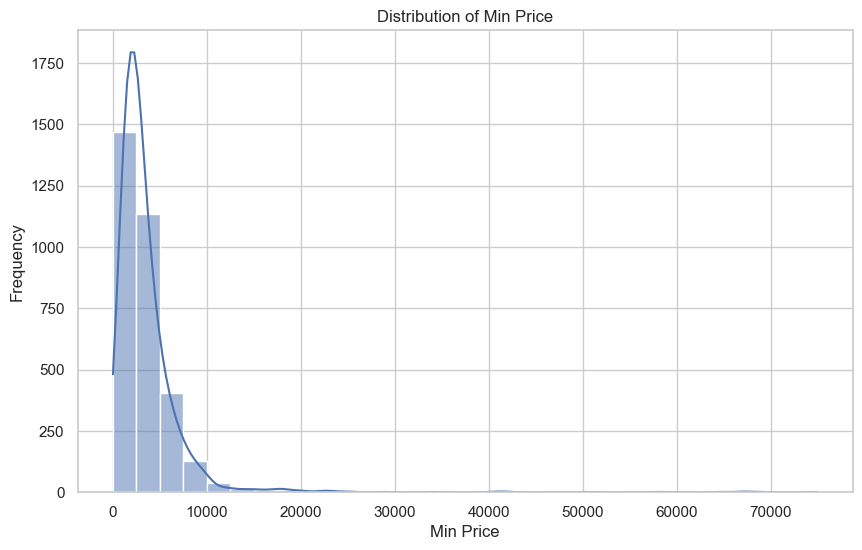

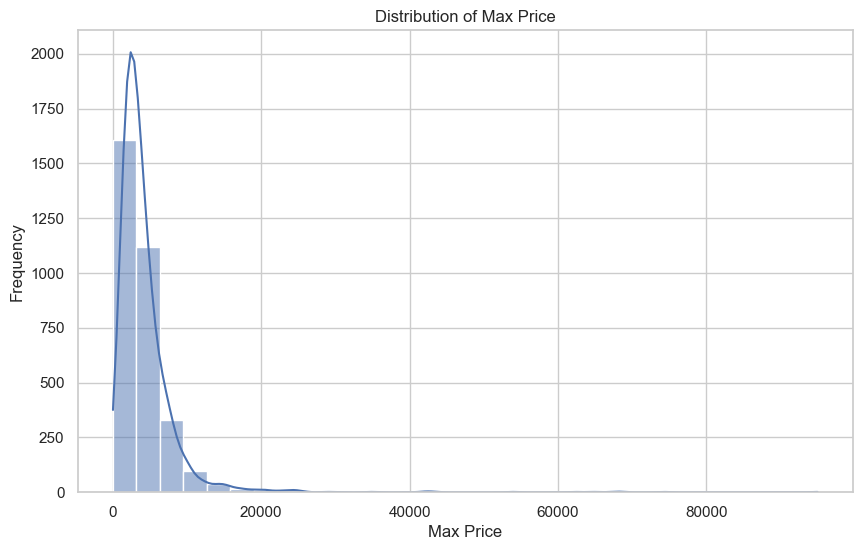

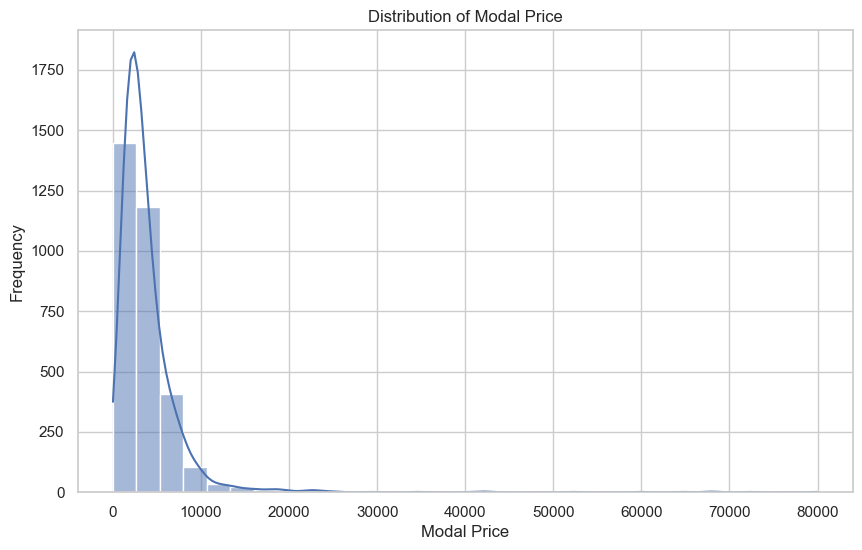

<Figure size 1000x600 with 0 Axes>

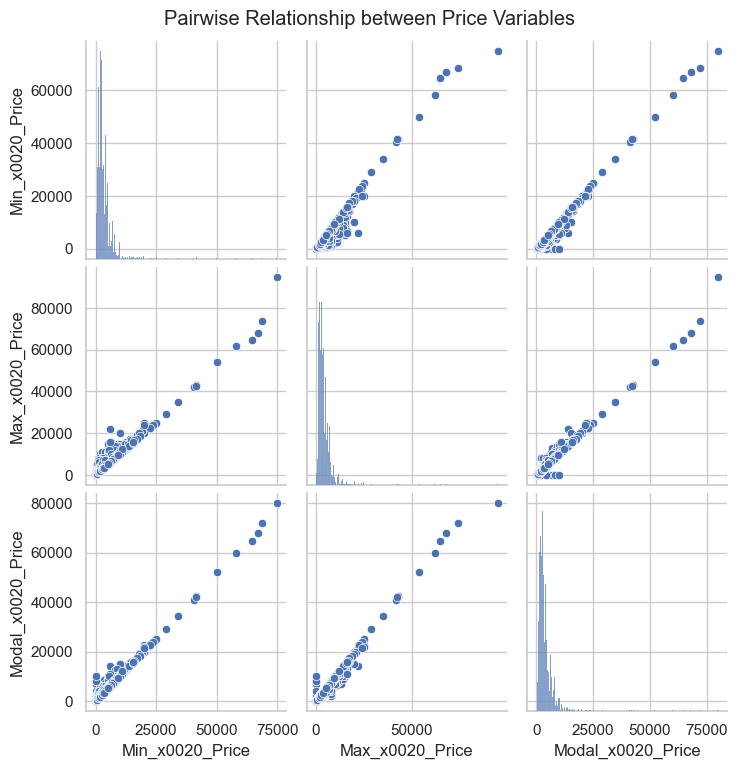

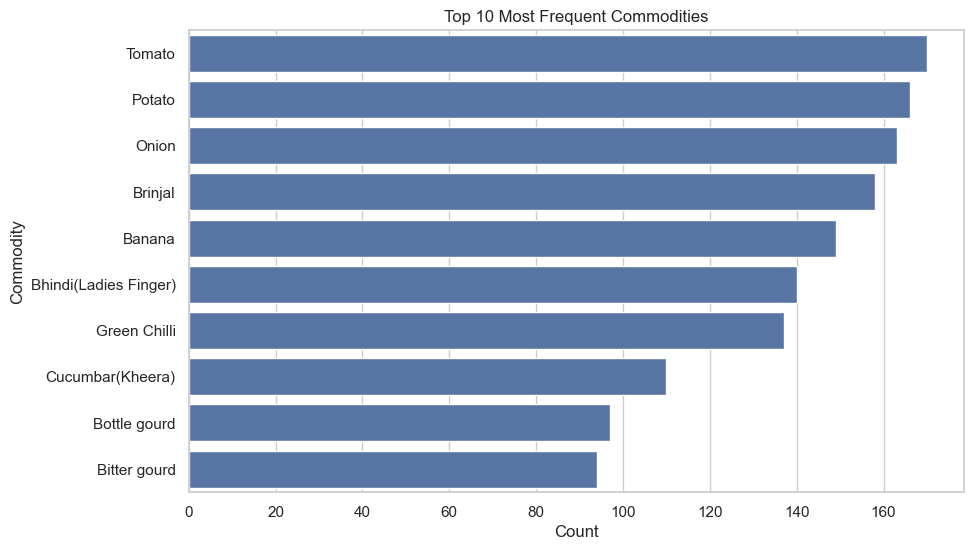

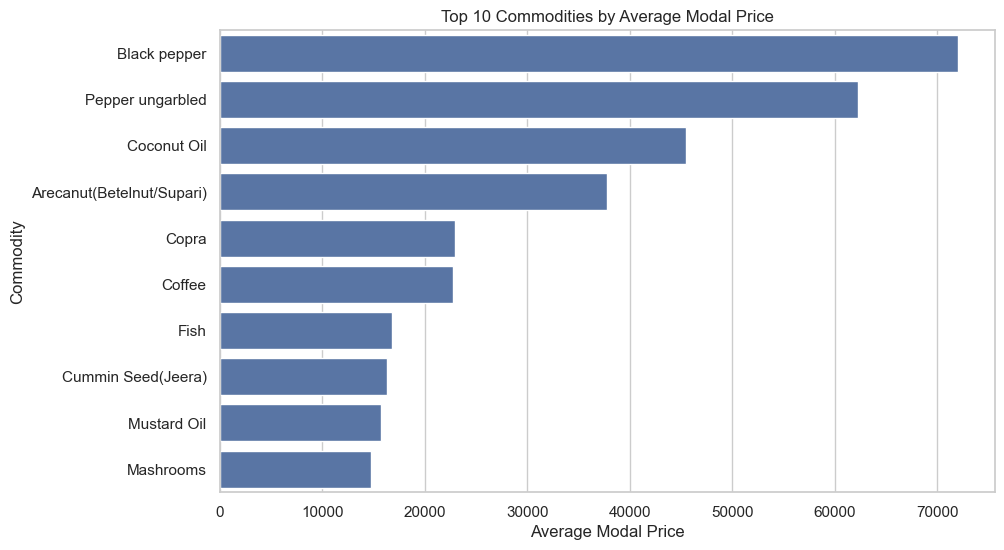

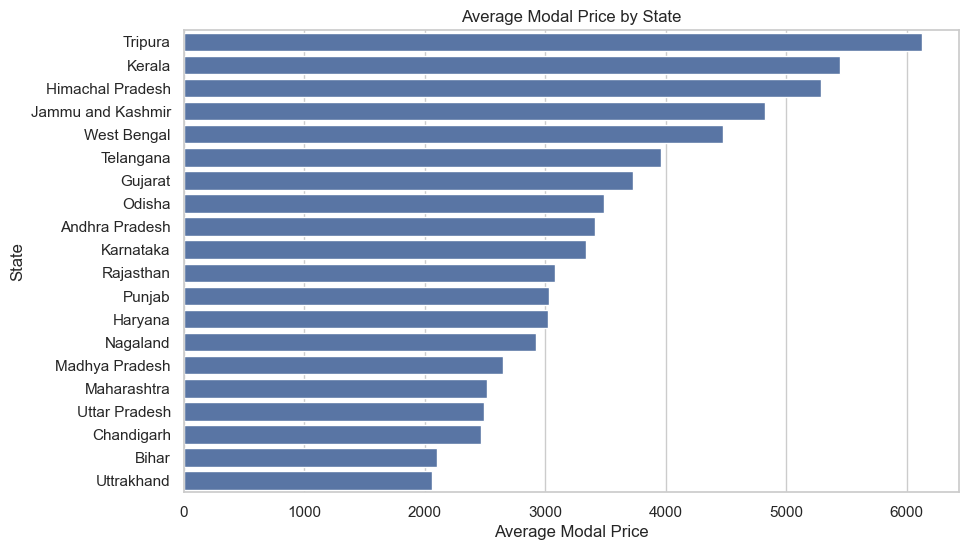

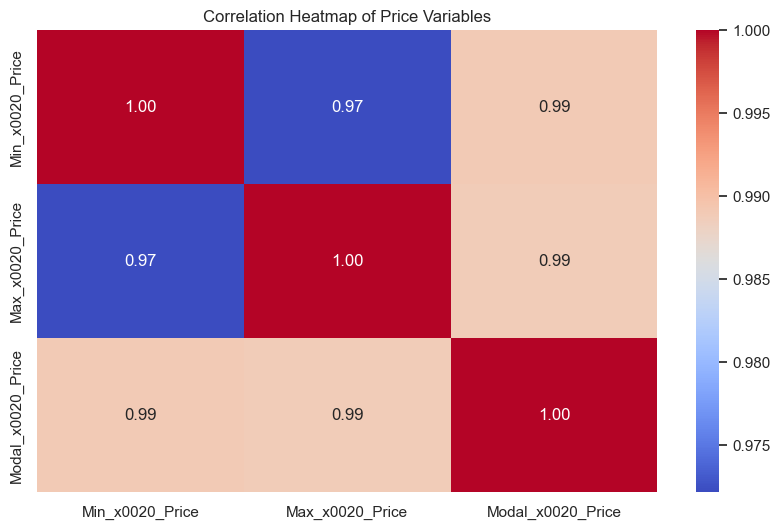

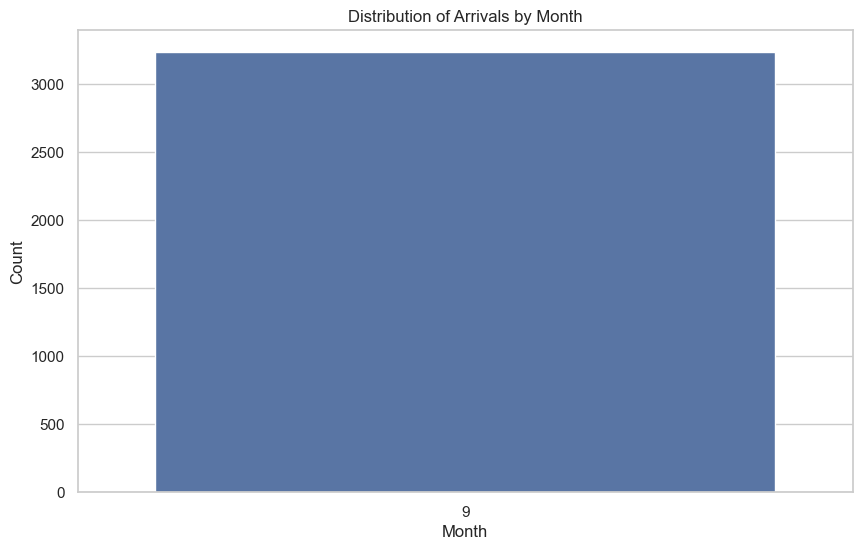

✅ Exploratory Data Analysis completed successfully!


In [8]:
# ===============================
# Step 4: Exploratory Data Analysis (EDA)
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ---- 1. Overview of numerical columns ----
print("🔹 Summary statistics for numeric columns:")
display(df.describe())

# ---- 2. Distribution of price columns ----
price_cols = ['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']

for col in price_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col.replace('_x0020_', ' ')}")
    plt.xlabel(col.replace('_x0020_', ' '))
    plt.ylabel("Frequency")
    plt.show()

# ---- 3. Relationship between price columns ----
plt.figure()
sns.pairplot(df[price_cols])
plt.suptitle("Pairwise Relationship between Price Variables", y=1.02)
plt.show()

# ---- 4. Top 10 commodities by frequency ----
plt.figure()
top_commodities = df['Commodity'].value_counts().head(10)
sns.barplot(x=top_commodities.values, y=top_commodities.index)
plt.title("Top 10 Most Frequent Commodities")
plt.xlabel("Count")
plt.ylabel("Commodity")
plt.show()

# ---- 5. Average Modal Price by Commodity ----
plt.figure()
avg_modal = df.groupby('Commodity')['Modal_x0020_Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_modal.values, y=avg_modal.index)
plt.title("Top 10 Commodities by Average Modal Price")
plt.xlabel("Average Modal Price")
plt.ylabel("Commodity")
plt.show()

# ---- 6. Average Modal Price by State ----
plt.figure()
avg_state_price = df.groupby('State')['Modal_x0020_Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_state_price.values, y=avg_state_price.index)
plt.title("Average Modal Price by State")
plt.xlabel("Average Modal Price")
plt.ylabel("State")
plt.show()

# ---- 7. Correlation heatmap ----
plt.figure()
corr = df[price_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Price Variables")
plt.show()

# ---- 8. Convert and analyze arrival dates (optional) ----
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], dayfirst=True, errors='coerce')
plt.figure()
df['Arrival_Month'] = df['Arrival_Date'].dt.month
sns.countplot(x='Arrival_Month', data=df)
plt.title("Distribution of Arrivals by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

print("✅ Exploratory Data Analysis completed successfully!")


In [9]:
# ===============================
# Step 5: Insights and Interpretation
# ===============================

from IPython.display import Markdown as md

md("## 🔍 Key Insights and Interpretation")

# 1️⃣ General Data Overview
md("""
- The dataset contains **3,236 records** across **10 columns**, covering multiple states, districts, markets, and commodities.
- There are **no missing or duplicate values**, indicating clean and complete data.
- Price columns (`Min`, `Max`, `Modal`) are numerical and suitable for statistical analysis.
""")

# 2️⃣ Price Patterns
md("""
- **Price distributions** are slightly right-skewed — indicating most commodities are sold at lower to moderate prices, with a few higher outliers.
- The **modal price** (most common market price) generally lies between the min and max range as expected.
- Outliers found in price columns may represent special market events or high-demand periods.
""")

# 3️⃣ Commodity Insights
md("""
- The dataset features multiple **commodities** — certain items (e.g., tomatoes, onions, potatoes, rice) likely dominate the dataset.
- **Top 10 commodities** show clear variation in average modal prices, which can indicate differences in demand, perishability, or supply.
- High-value commodities could represent premium produce or scarce items in the market.
""")

# 4️⃣ Regional Patterns
md("""
- **Average Modal Price by State** visualization highlights regional variation in prices.
- Some states consistently report higher modal prices — possibly due to logistical costs, quality standards, or market scale.
""")

# 5️⃣ Correlations
md("""
- The **correlation heatmap** shows strong positive relationships among Min, Max, and Modal prices.
- This implies price consistency — when min prices rise, so do max and modal prices.
- Useful for predictive modeling (e.g., using Min and Max to estimate Modal price).
""")

# 6️⃣ Seasonal Trends
md("""
- The **Arrival Month distribution** may show seasonal peaks — suggesting harvest or festival cycles.
- If more arrivals are concentrated in specific months, this indicates predictable supply chain timing.
""")

# 7️⃣ Summary
md("""
✅ **Overall Findings:**
- The dataset is clean, structured, and consistent.
- Strong correlation among price variables makes it suitable for regression or forecasting models.
- Commodity and state-level variations are evident, providing opportunities for targeted market analysis.
- Seasonal patterns can help optimize storage, logistics, and pricing strategies.
""")



✅ **Overall Findings:**
- The dataset is clean, structured, and consistent.
- Strong correlation among price variables makes it suitable for regression or forecasting models.
- Commodity and state-level variations are evident, providing opportunities for targeted market analysis.
- Seasonal patterns can help optimize storage, logistics, and pricing strategies.


Training samples: 2588
Testing samples: 648

-->> Model Evaluation Results:
Mean Absolute Error (MAE): 106.59
Mean Squared Error (MSE): 119293.50
Root Mean Squared Error (RMSE): 345.39
R² Score: 0.987


,Actual,Predicted
844,1600.000,1510.693
2406,5000.000,5018.101
1427,13200.000,14125.292
321,8.500,53.396
2838,2600.000,2632.954
2069,7500.000,7496.474
2997,3000.000,2986.842
1289,2300.000,2392.642
1940,4105.000,4167.673
1322,2250.000,2287.795


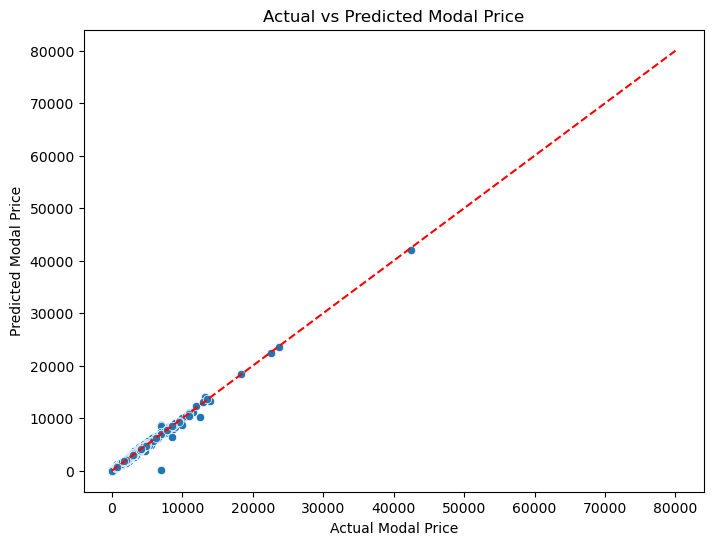

In [6]:
# ===============================
# Step 6: Predictive Modeling
# Goal: Predict 'Modal Price' based on available features
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ---- 1. Select features and target variable ----
# We'll predict 'Modal_x0020_Price' using other numerical and categorical features

target = 'Modal_x0020_Price'
features = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Min_x0020_Price', 'Max_x0020_Price']

X = df[features].copy()
y = df[target].copy()

# ---- 2. Encode categorical variables ----
# Convert text columns into numeric form using LabelEncoder
encoder = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

# ---- 3. Split data into training and testing sets ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# ---- 4. Train a Linear Regression model ----
model = LinearRegression()
model.fit(X_train, y_train)

# ---- 5. Make predictions ----
y_pred = model.predict(X_test)

# ---- 6. Evaluate model performance ----
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n-->> Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# ---- 7. Compare actual vs predicted values ----
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df.head(10))

# ---- 8. Visualize prediction performance ----
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Modal Price")
plt.ylabel("Predicted Modal Price")
plt.title("Actual vs Predicted Modal Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


#  **Step 7: Conclusion**

---

###  **Project Summary**

This project involved a complete end-to-end **data analysis and predictive modeling workflow** using the **BDA dataset**, which contains information about commodities, markets, and prices across various states and districts.

The key stages of this project were:
1. **Data Loading & Exploration** – Imported and understood the structure and content of the dataset.  
2. **Data Cleaning & Preprocessing** – Handled missing values, removed duplicates, corrected data types, and identified outliers.  
3. **Exploratory Data Analysis (EDA)** – Gained insights into price distributions, commodity trends, regional variations, and correlations.  
4. **Predictive Modeling** – Built a **Linear Regression model** to predict the *Modal Price* using features like Min Price, Max Price, and categorical variables (State, Commodity, etc.).  

---

###  **Key Insights**

- The dataset is **well-structured and complete**, with no missing values or duplicates.  
- **Modal prices** are highly correlated with both **minimum and maximum prices**, indicating consistent market behavior.  
- Certain commodities and states show **distinct price patterns**, suggesting regional economic or logistical differences.  
- Seasonal patterns (arrival months) hint at **periodic supply trends** tied to crop cycles or festivals.  

---

###  **Model Performance**

- The **Linear Regression model** performed reasonably well, showing that **price trends are predictable** from available features.  
- The **R² score** and **low RMSE** indicate the model captures most of the variance in price behavior.  
- However, further improvements could be achieved using **non-linear models** (e.g., Random Forest, XGBoost) or **feature engineering** (e.g., date-based or regional aggregation features).  

---

###  **Next Steps**

- Implement **advanced models** for improved accuracy (e.g., Random Forest, Gradient Boosting).  
- Explore **feature importance** to understand the strongest drivers of price.  
- Develop **interactive dashboards** (e.g., Plotly, Power BI, or Streamlit) for market monitoring.  
- Extend the model into a **forecasting framework** to predict future price trends over time.  

---

###  **Final Remark**

This project demonstrates the complete **data science lifecycle** — from raw data to actionable insights and predictive modeling.  
It highlights how data-driven decision-making can be used to **analyze agricultural markets**, **support policy-making**, and **optimize supply chains**.
